<h4> Problem testowania wielu hipotez

In [51]:
d = data.frame(x1 = runif(10), x2 = runif(10), x3 = runif(10), x4 = runif(10), x5 = runif(10), x6 = runif(10), x7 = runif(10), x8 = runif(10), x9 = runif(10), x10 = runif(10))
print(d)

          x1        x2          x3         x4         x5         x6         x7
1  0.1517625 0.8769762 0.479656416 0.88807513 0.55452071 0.45364881 0.51681870
2  0.9659410 0.6141504 0.278917585 0.11624687 0.50716065 0.02737966 0.21707486
3  0.6893987 0.8889160 0.003717388 0.76602062 0.55910631 0.84295853 0.30023037
4  0.6935325 0.8915585 0.482621814 0.96433201 0.23708665 0.35134870 0.91761401
5  0.7793549 0.2882533 0.798764063 0.83372196 0.86074014 0.29081830 0.95105327
6  0.9385063 0.9371172 0.190622811 0.81066628 0.84116473 0.71256010 0.44559432
7  0.2230799 0.6021071 0.550568787 0.98908783 0.11256259 0.90629223 0.87166445
8  0.5838892 0.9398664 0.948175797 0.29937046 0.23896264 0.40544109 0.78991793
9  0.8561472 0.9431413 0.258801522 0.08089594 0.73370131 0.74180774 0.08327653
10 0.9341386 0.6996976 0.728294100 0.11438275 0.09756577 0.54593279 0.98630784
          x8          x9        x10
1  0.5828390 0.355733722 0.42111446
2  0.3027436 0.000167401 0.87558923
3  0.4817403 0.30425004

In [52]:
p_values = c()
for (i in 1:9){
    for (j in (i+1):10){
            p_values = append(p_values, t.test(x=d[,i], y=d[,j] ,conf.level=0.90)$p.value)
    }
}

print(p_values)

 [1] 0.457761049 0.126343033 0.538529376 0.125905033 0.238701269 0.605976967
 [7] 0.197430757 0.029534438 0.313956365 0.020603602 0.211401946 0.019651652
[13] 0.043894468 0.223190563 0.034327876 0.003184092 0.086548467 0.465567734
[19] 0.986494594 0.667349120 0.349835311 0.762741461 0.473545980 0.660551814
[25] 0.470547671 0.700182945 0.894546657 0.624389560 0.184588969 0.757516146
[31] 0.676090587 0.352944771 0.773121201 0.458086415 0.668683201 0.567115023
[37] 0.896415820 0.245195395 0.955987569 0.494269720 0.116004681 0.637281404
[43] 0.301642014 0.864267829 0.273382720


<h4> Zadanie1: Jeżeli przy wykonywaniu jednego testu prawdopodobieństwo popełnienia błędu wynosi $\alpha=0.05$ (czyli prawdopodobieństwo nie popełnienia błędu wynosi $0.95$) to ile wynosi prawdopodobieństwo, że popełnimy chociaż jeden błąd testując 10 niezależnych hipotez?

<h4> T-test

$H_0: \mu_1 = \mu_2$ 

$H_1: \mu_1 \neq \mu_2$

Założenia:
- rozkład normalny
- ta sama wariancja
- niezależność

In [3]:
mel = read.delim(file = 'melatonina.txt', sep=" ") #dane dotyczą 20 doroslych mezczyzn. 10 z nich otrzymalo melatonine przed snem (5mg). Czy mialo to wplyw na dlugosc snu?
head(mel)

id,sleep,group
1,8.145150,control
2,7.522362,treatment
3,6.935754,control
4,8.959435,treatment
5,6.985122,control
6,8.072651,treatment


In [4]:
mel_c = mel[mel$group == "control",]
shapiro.test(subset(mel_c, select = c(sleep))$sleep); sd(subset(mel_c, select = c(sleep))$sleep)

mel_t = mel[mel$group == "treatment",]
shapiro.test(subset(mel_t, select = c(sleep))$sleep); sd(subset(mel_t, select = c(sleep))$sleep)


	Shapiro-Wilk normality test

data:  subset(mel_c, select = c(sleep))$sleep
W = 0.93638, p-value = 0.5135


[1] 1.67219


	Shapiro-Wilk normality test

data:  subset(mel_t, select = c(sleep))$sleep
W = 0.92649, p-value = 0.4143


[1] 1.555904

In [5]:
t.test(sleep ~ group, data = mel) #czy srednie pomiedzy kontrolą a grupą traktowaną sie roznią? Jezeli przyjmiemy poziom istotnosci 0.10 to tak


	Welch Two Sample t-test

data:  sleep by group
t = -2.0854, df = 17.907, p-value = 0.05161
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.02434584  0.01173884
sample estimates:
  mean in group control mean in group treatment 
               6.827152                8.333456 


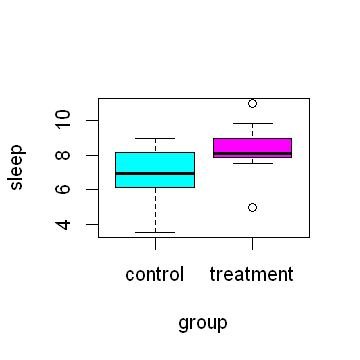

In [6]:
options(repr.plot.width=3, repr.plot.height=3)
boxplot(sleep ~ group, data = mel, col = 5:6)

<h4> Test Wilcoxon-Mann-Whitney

In [2]:
library(ggplot2)
head(msleep) #dane są z ggplot2

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.000
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300,600.000
Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.850


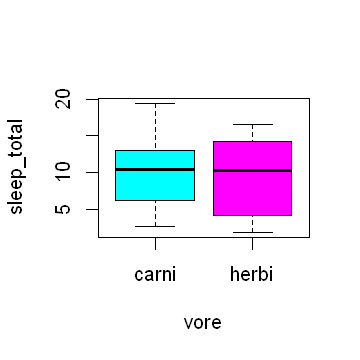

In [8]:
t = subset(msleep, vore == "carni" | vore == "herbi")
boxplot(sleep_total ~ vore, data = t, col = 5:6)

In [9]:
wilcox.test(sleep_total ~ vore, data = t,  exact = FALSE)


	Wilcoxon rank sum test with continuity correction

data:  sleep_total by vore
W = 325, p-value = 0.6895
alternative hypothesis: true location shift is not equal to 0


- Co jeżeli więcej niż 2 grupy?

<h3> Analiza wariancji (ANOVA)

- ANOVA Jednoczynnikowa

In [2]:
library(faraway)
names(coagulation)

Warning message:
"package 'faraway' was built under R version 3.6.3"

[1] "coag" "diet"

In [11]:
head(coagulation) #24 zwierzeta podzielone na 4 grupy ze wzgledu na rodzaj diety

coag,diet
62,A
60,A
63,A
59,A
63,B
67,B


In [12]:
print(coagulation$diet)

 [1] A A A A B B B B B B C C C C C C D D D D D D D D
Levels: A B C D


In [65]:
?coagulation

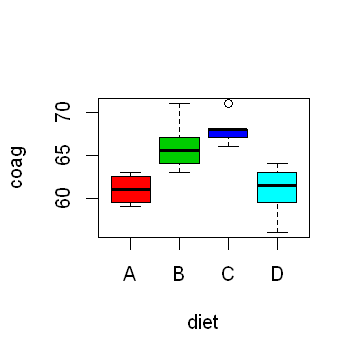

In [14]:
plot(coag ~ diet, data = coagulation, col = 2:5)

In [15]:
coag_aov = aov(coag ~ diet, data = coagulation) #test ANOVA
print(coag_aov)

Call:
   aov(formula = coag ~ diet, data = coagulation)

Terms:
                diet Residuals
Sum of Squares   228       112
Deg. of Freedom    3        20

Residual standard error: 2.366432
Estimated effects may be unbalanced


In [16]:
summary(coag_aov) #dieta ma wplyw

            Df Sum Sq Mean Sq F value   Pr(>F)    
diet         3    228    76.0   13.57 4.66e-05 ***
Residuals   20    112     5.6                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [17]:
diety = data.frame(diet = unique(coagulation$diet))
data.frame(diety, coag = predict(coag_aov, diety)) #srednie przewidziane dla kazdej grupy

diet,coag
A,61
B,66
C,68
D,61


In [18]:
#ale ktore srednie są rozne?
with(coagulation, pairwise.t.test(coag, diet, p.adj = "none"))


	Pairwise comparisons using t tests with pooled SD 

data:  coag and diet 

  A       B       C      
B 0.00380 -       -      
C 0.00018 0.15878 -      
D 1.00000 0.00086 2.3e-05

P value adjustment method: none 

In [19]:
with(coagulation, pairwise.t.test(coag, diet, p.adj = "bonferroni")) #uwzględniając poprawkę Bonferroniego (wielokrotne testowanie); obserwujemy wyzsze wartosci p-value


	Pairwise comparisons using t tests with pooled SD 

data:  coag and diet 

  A       B       C      
B 0.02282 -       -      
C 0.00108 0.95266 -      
D 1.00000 0.00518 0.00014

P value adjustment method: bonferroni 

In [20]:
#Test HSD Tukeya (stosowany post hoc - po analizie wariancji)
TukeyHSD(coag_aov, conf.level = 0.95) #uwzglednia poprawke na wielokrotne powtorzenia

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = coag ~ diet, data = coagulation)

$diet
             diff         lwr       upr     p adj
B-A  5.000000e+00   0.7245544  9.275446 0.0183283
C-A  7.000000e+00   2.7245544 11.275446 0.0009577
D-A -1.421085e-14  -4.0560438  4.056044 1.0000000
C-B  2.000000e+00  -1.8240748  5.824075 0.4766005
D-B -5.000000e+00  -8.5770944 -1.422906 0.0044114
D-C -7.000000e+00 -10.5770944 -3.422906 0.0001268


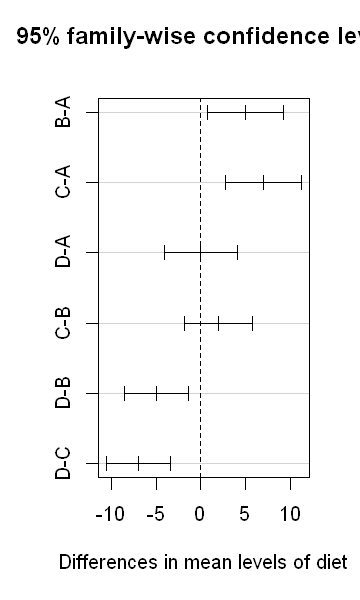

In [21]:
options(repr.plot.width=3, repr.plot.height=5)
plot(TukeyHSD(coag_aov, conf.level = 0.95))

- ANOVA Wieloczynnikowa

In [3]:
summary(rats) #dane dotyczące 48 szczurów, testowano 3 trucizny (poison), 4 lekarstwa (treat) i obserwowano czas zycia (time; w dziesiątkach godzin)

      time        poison   treat 
 Min.   :0.1800   I  :16   A:12  
 1st Qu.:0.3000   II :16   B:12  
 Median :0.4000   III:16   C:12  
 Mean   :0.4794            D:12  
 3rd Qu.:0.6225                  
 Max.   :1.2400                  

In [4]:
head(rats)

time,poison,treat
0.31,I,A
0.82,I,B
0.43,I,C
0.45,I,D
0.45,I,A
1.10,I,B


In [13]:
mean(rats[rats$poison == "I" & rats$treat == "A",]$time)

[1] 0.4125

In [8]:
mean(rats[rats$poison == "I" & rats$treat == "C",]$time)

[1] 0.5675

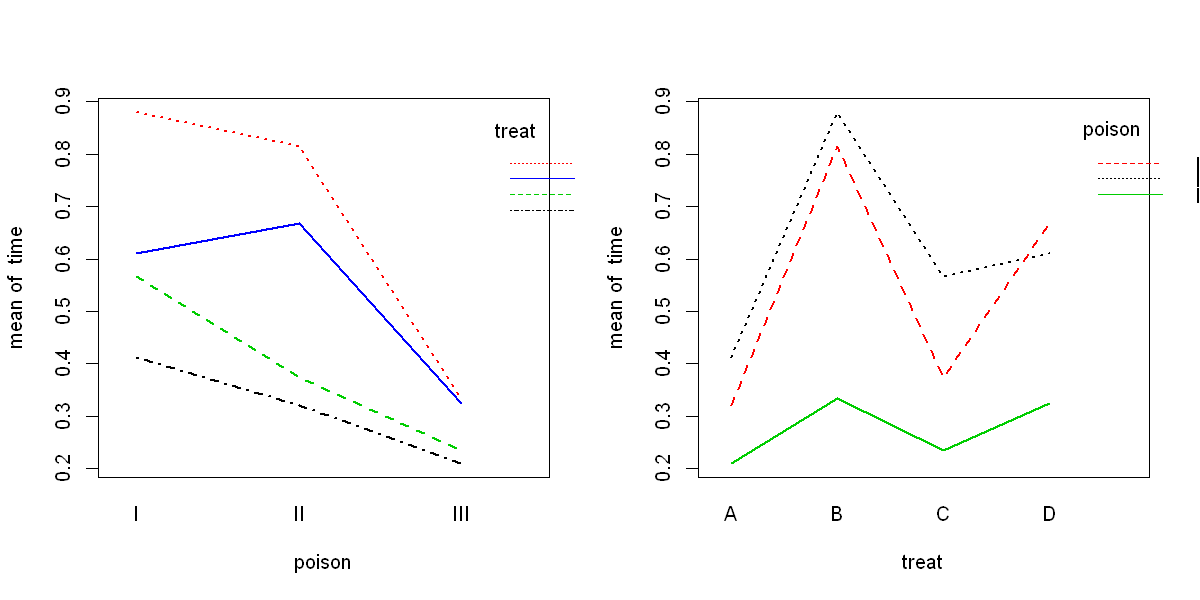

In [9]:
options(repr.plot.width=10, repr.plot.height=5)

par(mfrow = c(1, 2))
with(rats, interaction.plot(poison, treat, time, lwd = 2, col = 1:4))
with(rats, interaction.plot(treat, poison, time, lwd = 2, col = 1:3))

In [10]:
rats_int = aov(time ~ poison * treat, data = rats) # interaction model, gwiazdka oznacza ze rozwazamy interakcje i efekty addytywne; dwukropek oznaczalby tylko interakacje
rats_add = aov(time ~ poison + treat, data = rats) # additive model
rats_pois = aov(time ~ poison , data = rats) # single factor model
rats_treat = aov(time ~ treat, data = rats) # single factor model
rats_null = aov(time ~ 1, data = rats) # null model

In [27]:
rats_table = expand.grid(poison = unique(rats$poison), treat = unique(rats$treat))
print(rats_table)

   poison treat
1       I     A
2      II     A
3     III     A
4       I     B
5      II     B
6     III     B
7       I     C
8      II     C
9     III     C
10      I     D
11     II     D
12    III     D


In [28]:
print(matrix(paste0(rats_table$poison, "-", rats_table$treat) , 4, 3, byrow = TRUE))

     [,1]  [,2]   [,3]   
[1,] "I-A" "II-A" "III-A"
[2,] "I-B" "II-B" "III-B"
[3,] "I-C" "II-C" "III-C"
[4,] "I-D" "II-D" "III-D"


In [29]:
#estymuje srednie

get_est_means = function(model, table) {
mat = matrix(predict(model, table), nrow = 4, ncol = 3, byrow = TRUE)
colnames(mat) = c("I", "II", "III")
rownames(mat) = c("A", "B", "C", "D")
mat
}


In [30]:
knitr::kable(get_est_means(model = rats_int, table = rats_table)) #interaction model



|   |      I|     II|   III|
|:--|------:|------:|-----:|
|A  | 0.4125| 0.3200| 0.210|
|B  | 0.8800| 0.8150| 0.335|
|C  | 0.5675| 0.3750| 0.235|
|D  | 0.6100| 0.6675| 0.325|

In [31]:
knitr::kable(get_est_means(model = rats_add, table = rats_table)) #model addytywny



|   |         I|        II|       III|
|:--|---------:|---------:|---------:|
|A  | 0.4522917| 0.3791667| 0.1110417|
|B  | 0.8147917| 0.7416667| 0.4735417|
|C  | 0.5306250| 0.4575000| 0.1893750|
|D  | 0.6722917| 0.5991667| 0.3310417|

In [32]:
additive_means = get_est_means(model = rats_add, table = rats_table)
additive_means["A",] - additive_means["B",] #efekt leczenia w modelu addytywnnym (te same wartosci--> ten sam efekt)

I      II     III 
-0.3625 -0.3625 -0.3625

In [33]:
interaction_means = get_est_means(model = rats_int, table = rats_table)
interaction_means["A",] - interaction_means["B",] #efekt leczenia w modelu z interakcją (rozne wartosci)

I      II     III 
-0.4675 -0.4950 -0.1250

In [34]:
knitr::kable(get_est_means(model = rats_pois, table = rats_table))



|   |      I|       II|     III|
|:--|------:|--------:|-------:|
|A  | 0.6175| 0.544375| 0.27625|
|B  | 0.6175| 0.544375| 0.27625|
|C  | 0.6175| 0.544375| 0.27625|
|D  | 0.6175| 0.544375| 0.27625|

In [35]:
knitr::kable(get_est_means(model = rats_treat, table = rats_table))



|   |         I|        II|       III|
|:--|---------:|---------:|---------:|
|A  | 0.3141667| 0.3141667| 0.3141667|
|B  | 0.6766667| 0.6766667| 0.6766667|
|C  | 0.3925000| 0.3925000| 0.3925000|
|D  | 0.5341667| 0.5341667| 0.5341667|

In [36]:
knitr::kable(get_est_means(model = rats_null, table = rats_table))



|   |        I|       II|      III|
|:--|--------:|--------:|--------:|
|A  | 0.479375| 0.479375| 0.479375|
|B  | 0.479375| 0.479375| 0.479375|
|C  | 0.479375| 0.479375| 0.479375|
|D  | 0.479375| 0.479375| 0.479375|

In [6]:
summary(aov(time ~ poison * treat, data = rats)) #interakcja nie jest znacząca, pojedyczne cechy znaczące --> wybierzemy model addytywny

             Df Sum Sq Mean Sq F value   Pr(>F)    
poison        2 1.0330  0.5165  23.222 3.33e-07 ***
treat         3 0.9212  0.3071  13.806 3.78e-06 ***
poison:treat  6 0.2501  0.0417   1.874    0.112    
Residuals    36 0.8007  0.0222                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [38]:
TukeyHSD(aov(time ~ poison + treat, data = rats))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = time ~ poison + treat, data = rats)

$poison
            diff        lwr        upr     p adj
II-I   -0.073125 -0.2089936  0.0627436 0.3989657
III-I  -0.341250 -0.4771186 -0.2053814 0.0000008
III-II -0.268125 -0.4039936 -0.1322564 0.0000606

$treat
           diff         lwr         upr     p adj
B-A  0.36250000  0.18976135  0.53523865 0.0000083
C-A  0.07833333 -0.09440532  0.25107198 0.6221729
D-A  0.22000000  0.04726135  0.39273865 0.0076661
C-B -0.28416667 -0.45690532 -0.11142802 0.0004090
D-B -0.14250000 -0.31523865  0.03023865 0.1380432
D-C  0.14166667 -0.03107198  0.31440532 0.1416151


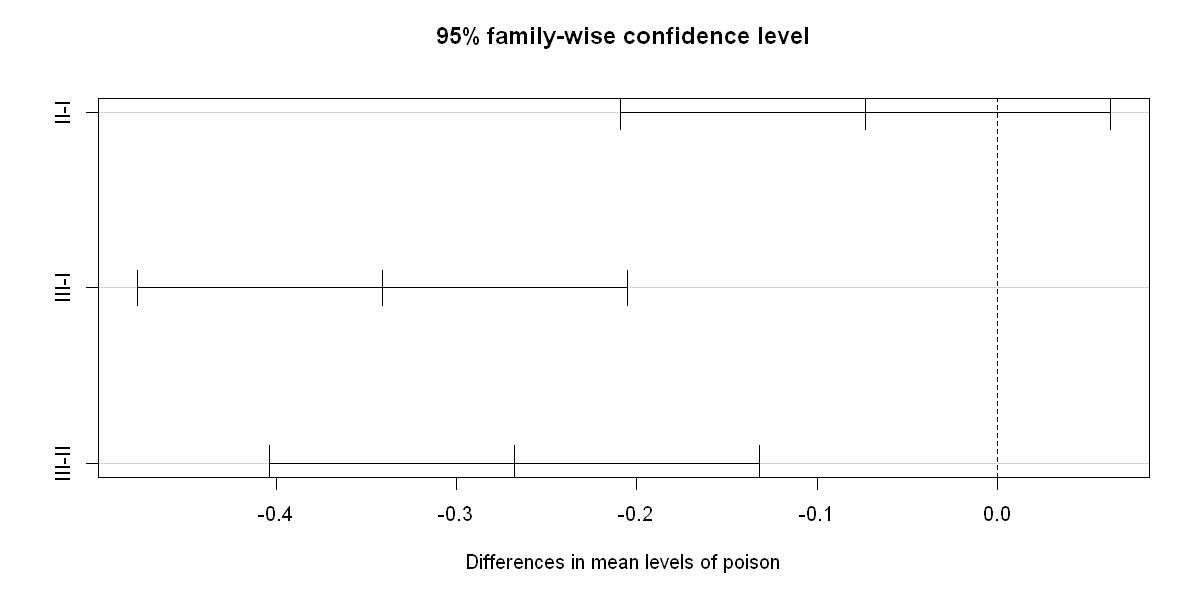

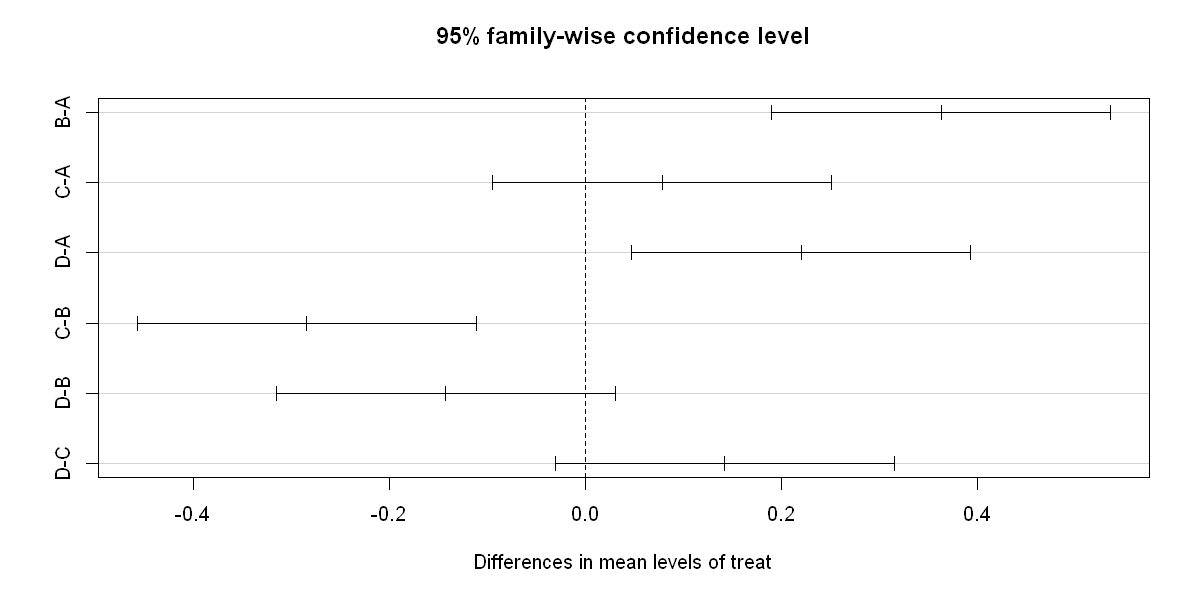

In [39]:
plot(TukeyHSD(aov(time ~ poison + treat, data = rats)))

<h4> Zadanie2: Rozważ dane $warpbreaks$. Czego dotyczą te dane? Narysuj odpowiednie wykresy interakcji pomiędzy wool and tension. Wykonaj test anova. Czy zachodzi tutaj interakcja? Skomentuj otrzymane wyniki.

In [69]:
?warpbreaks

In [41]:
head(warpbreaks)

breaks,wool,tension
26,A,L
30,A,L
54,A,L
25,A,L
70,A,L
52,A,L


<h3> Test Kruskala-Wallisa

- stosujemy gdy problem z założeniem normalności (ciągle jednak zakładamy równe wariancje); zadajemy pytanie czy grupy mają równe mediany (H0)

In [42]:
library(MASS) #tam m.in. jest zbior survey
head(survey)

Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
Female,18.5,18.0,Right,R on L,92,Left,Some,Never,173.00,Metric,18.250
Male,19.5,20.5,Left,R on L,104,Left,None,Regul,177.80,Imperial,17.583
Male,18.0,13.3,Right,L on R,87,Neither,None,Occas,NA,NA,16.917
Male,18.8,18.9,Right,R on L,NA,Neither,None,Never,160.00,Metric,20.333
Male,20.0,20.0,Right,Neither,35,Right,Some,Never,165.00,Metric,23.667
Female,18.0,17.7,Right,L on R,64,Right,Some,Never,172.72,Imperial,21.000


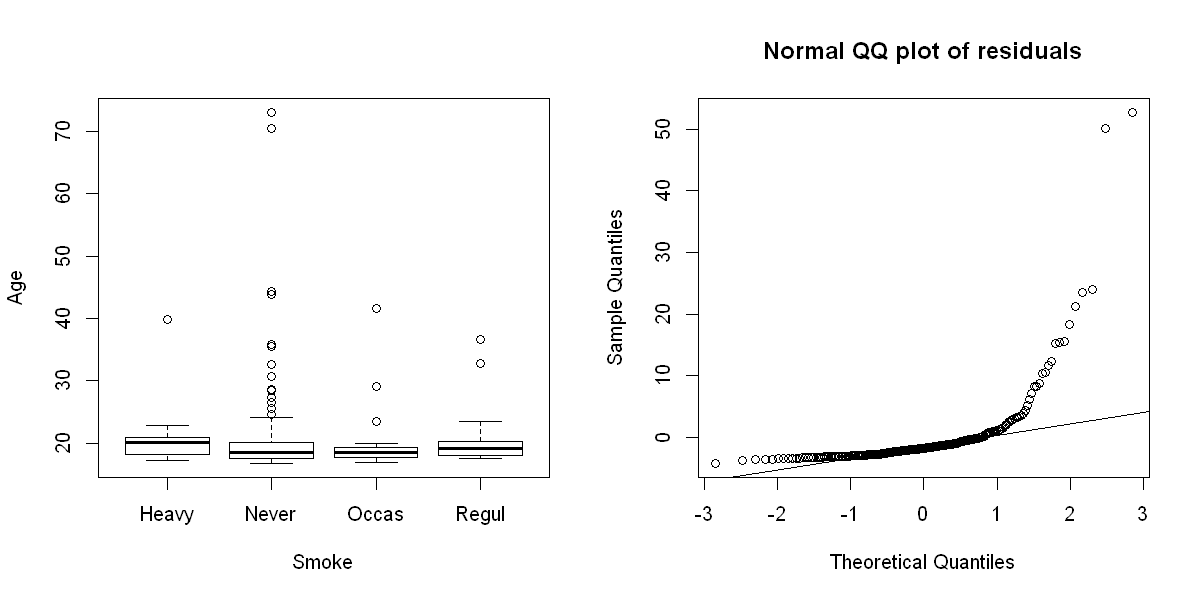

In [43]:
options(repr.plot.width=10, repr.plot.height=5)

par(mfrow = c(1, 2))
boxplot(Age~Smoke,data=survey)
age.means <- tapply(survey$Age,survey$Smoke,mean) #srednia z wieku wg Smoke
age.meancen <- survey$Age-age.means[as.numeric(survey$Smoke)]
qqnorm(age.meancen,main="Normal QQ plot of residuals")
qqline(age.meancen)

In [44]:
age.means

Heavy    Never    Occas    Regul 
21.39400 20.26151 20.34216 21.12747

In [45]:
kruskal.test(Age~Smoke,data=survey) #nie wskazuje na istotną roznicę


	Kruskal-Wallis rank sum test

data:  Age by Smoke
Kruskal-Wallis chi-squared = 3.9262, df = 3, p-value = 0.2695


<h3> Uzupełnienie 

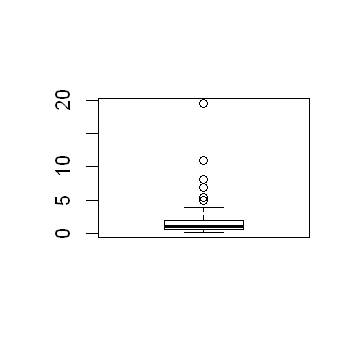

In [139]:
options(repr.plot.width=3, repr.plot.height=3)
y = c(0.38,1.43,1.2,1.45,1.44,0.98,6.91,2.28,1.02,0.55,1.18,0.59,0.41,1.08,0.75,1.99,0.14,1.64,2.54,1.94,1.7,1.04,0.67,2.59,0.34,0.48,0.4,0.25,0.3,8.07,5.41,10.9,3.85,0.59,1.61,0.48,1.71,0.78,0.74,0.49,1.07,3.18,19.53,0.37,0.46,2.71,1.01,1.3,4.98,0.78)
boxplot(y)

In [47]:
shapiro.test(y)


	Shapiro-Wilk normality test

data:  y
W = 0.55292, p-value = 4.139e-11


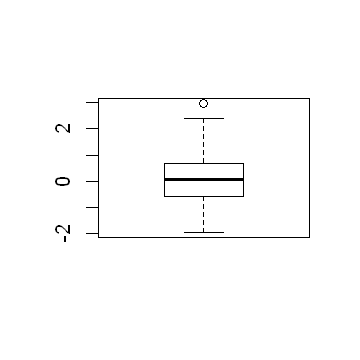

In [48]:
#transformacja danych

y2 = log(y)
boxplot(y2)

In [49]:
shapiro.test(y2)


	Shapiro-Wilk normality test

data:  y2
W = 0.97701, p-value = 0.434


<h4> Zadanie3: Zaproponuj odpowiednią transformację danych tak aby rozkład danych po tej operacji był normalny.

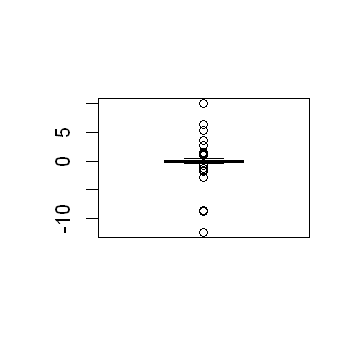

In [1]:
options(repr.plot.width=3, repr.plot.height=3)
y = c(-0.11,6.26,0.07,-0.29,-0.16,1.1,0,1.41,5.33,-1.7,0.4,-1.66,-0.83,-0.02,0,-0.06,-0.01,-0.08,-0.18,-8.74,1.24,-0.41,-1.87,0.93,0.01,9.97,0.11,0.01,2.78,-0.32,0.01,-0.22,0.44,0.01,-8.62,0.02,0.08,-12.39,0,0.17,0.1,-2.78,3.51,0.06,-0.01,0,0.08,-1.37,0.02,0)
boxplot(y)